# Github Link : https://github.com/nancypal50/DL_LAB/tree/main/Assi4
NANCY PAL 20MAI0050
TRANSFER LEARNING AND FINE TUNING FOR LARGE DATASET OF CATS AND DOGS

In [1]:
#importing necessary libraries

import numpy as np
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from keras.layers.normalization import BatchNormalization


In [ ]:
# taking predefined model as alexnet which is previously created in assi 3.
model = load_model(r'alexnet_model.h5')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_29 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_29 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_30 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_30 (Activation)   (None, 4, 4, 256)        

In [ ]:
#this removes the last layer from out loaded model i.e that classification layer
for i in range(3):
    model.pop()

In [ ]:
#Then, freeze the base model.
model.trainable = False

# Now fine tuning the last layers by changing the dropout values and changing number of filters

In [ ]:
# this removes all the layers upto flatening layeri.e. keeping all feature extraction layer fixed 
#while adding new one(i.e. SVM) according to my dataset i.e cat and dogs 25k images
# and even finetuning it with changing hyperparameters of some layers and changing dropout values
for i in range(0,13):
    model.pop()

In [ ]:

#Passing it to a Fully Connected layer
model.add(Flatten())



# Changing 1st ad 2nd fully connected layers:
number of filters to 2048 and dropout to 0.3

In [ ]:
# 1st Fully Connected Layer
model.add(Dense(2048, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

In [ ]:
# 2nd Fully Connected Layer
model.add(Dense(2048, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

# Changing hyperparameters of fully connected layers
number of filters passed in dense layer is 1024 and dropout is 0.1


In [ ]:
#3rd Fully Connected Layber
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.1))

# Changing the output layer to have 2 classes as ouput and sigmoid as activation function

In [ ]:
#Output Layer having 2 output classes
model.add(Dense(1))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

In [ ]:
#Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_29 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_29 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_30 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_30 (Activation)   (None, 4, 4, 256)        

# After fine tuning applying SVM having learning rate to 0.001 and momentum to 0.9 to the output layer with loss as binary entropy and metrics as accuracy

In [ ]:
# Compiling the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss = "binary_crossentropy", optimizer= opt, metrics=['accuracy'])

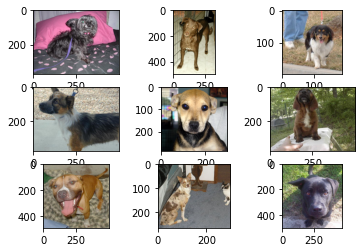

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of datase
folder = r"E:\\vit2020\\SEM2\\DL\\LAB_DATA\\Cats-Dogs\\train\\"
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog\\' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

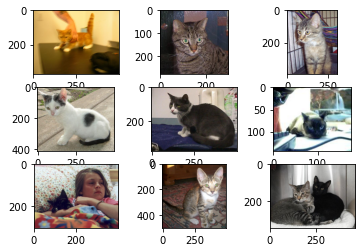

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = r"E:\\vit2020\\SEM2\\DL\\LAB_DATA\\Cats-Dogs\\train\\"
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat/' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = r"E:\\vit2020\\SEM2\\DL\\LAB_DATA\\train\\"
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    print(file)
    # determine class
    output = 0.0
    if file.startswith('dog'):
        for i in range(0,1999):
                photo = load_img(folder + file+"\\" +str(i) + '.jpg', target_size=(32, 32))
                # convert to numpy array
                photo = img_to_array(photo)
                # store
                photos.append(photo)
                labels.append(output)
    if file.startswith('cat'):
        output = 1.0
        # load image
        for i in range(0,1999):
            photo = load_img(folder + file+"\\" +str(i) + '.jpg', target_size=(32, 32))
            # convert to numpy array
            photo = img_to_array(photo)
            # store
            photos.append(photo)
            labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

cat
dog
(3998, 32, 32, 3) (3998,)


In [ ]:

# load and confirm the shape
from numpy import load
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

(3998, 32, 32, 3) (3998,)


In [ ]:
# create data generator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# prepare iterators
train_it = datagen.flow_from_directory(r'E:\\vit2020\\SEM2\\DL\\LAB_DATA\\train',
	class_mode='binary', batch_size=64, target_size=(32, 32))
test_it = datagen.flow_from_directory(r'E:\vit2020\SEM2\DL\LAB_DATA\test',
	class_mode='binary', batch_size=64, target_size=(32, 32))

Found 25000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)

Epoch 1/10
391/391 [==============================] - 672s 2s/step - loss: 0.5048 - accuracy: 0.7634 - val_loss: 0.6678 - val_accuracy: 0.6290
Epoch 2/10
391/391 [==============================] - 749s 2s/step - loss: 0.4694 - accuracy: 0.7870 - val_loss: 0.6951 - val_accuracy: 0.6470
Epoch 3/10
391/391 [==============================] - 404s 1s/step - loss: 0.4352 - accuracy: 0.8078 - val_loss: 0.4559 - val_accuracy: 0.8190
Epoch 4/10
391/391 [==============================] - 409s 1s/step - loss: 0.4082 - accuracy: 0.8237 - val_loss: 0.6110 - val_accuracy: 0.7980
Epoch 5/10
391/391 [==============================] - 400s 1s/step - loss: 0.3720 - accuracy: 0.8435 - val_loss: 0.6786 - val_accuracy: 0.6660
Epoch 6/10
391/391 [==============================] - 429s 1s/step - loss: 0.3378 - accuracy: 0.8642 - val_loss: 0.4047 - val_accuracy: 0.8330
Epoch 7/10
391/391 [==============================] - 386s 986ms/step - loss: 0.3120 - accuracy: 0.8764 - val_loss: 0.3519 - val_accuracy: 0.7

In [ ]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

16/16 [==============================] - 50s 3s/step
> 91.100


In [ ]:
print('Accuracy :  %.3f' % (acc * 100.0))

Accuracy :  91.100


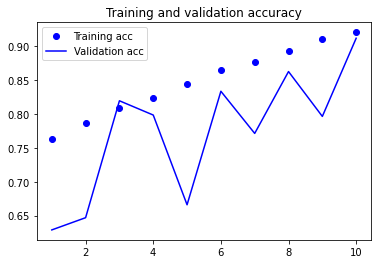

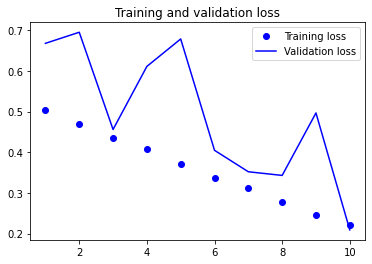

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save("fine_tune_model.h5")